In [29]:
# Importing the lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lightgbm as lgb
import seaborn as sns
from sklearn.model_selection import train_test_split,KFold

In [30]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [31]:
train_original = pd.read_csv('train.csv')
test_original = pd.read_csv('test.csv')

In [32]:
test_original.dtypes

reservation_id               object
booking_date                 object
checkin_date                 object
checkout_date                object
channel_code                  int64
main_product_code             int64
numberofadults                int64
numberofchildren              int64
persontravellingid            int64
resort_region_code            int64
resort_type_code              int64
room_type_booked_code         int64
roomnights                    int64
season_holidayed_code       float64
state_code_residence        float64
state_code_resort             int64
total_pax                     int64
member_age_buckets           object
booking_type_code             int64
memberid                     object
cluster_code                 object
reservationstatusid_code     object
resort_id                    object
dtype: object

In [33]:
train.head(10)

,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,...,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled
0,07659f3758d8aee27f5a7e2887adeacb67021cb95ada1b...,05/04/18,05/04/18,06/04/18,3,1,2,0,46,3,...,7.0,3,3,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,C,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,7.706428
1,03930f033646d073462b35d411616323597715ac4fc398...,23/01/15,11/04/15,16/04/15,1,1,2,0,46,3,...,7.0,5,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,A,39fa9ec190eee7b6f4dff1100d6343e10918d044c75eac...,6.662563
2,d145a32920e6587ad95bfe299d80c0affa268220535aaf...,28/01/15,01/02/15,05/02/15,1,1,2,0,47,1,...,7.0,1,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,E,A,535fa30d7e25dd8a49f1536779734ec8286108d115da50...,7.871602
3,cfd77f44811ed62f25a220b53324cdbafc662a4c9e5f04...,02/05/15,11/06/15,16/06/15,1,1,2,2,46,2,...,7.0,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,5.344943
4,937cff9e4dcfc2459620153dfc8b9962ac22bea67dfb29...,02/09/15,14/12/15,19/12/15,1,1,2,0,46,2,...,7.0,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,7.059346
5,cc8f05558362b7589004e57044e8b558bd228fc70da5b0...,01/12/15,12/01/16,13/01/16,1,1,2,0,47,1,...,7.0,6,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,A,b17ef6d19c7a5b1ee83b907c595526dcb1eb06db8227d6...,8.167707
6,6827da5d76c626deeed81eb9f3afef635db4c17c9cbea0...,20/01/16,20/01/16,21/01/16,3,1,2,0,46,2,...,7.0,9,1,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,B,A,ff5a1ae012afa5d4c889c50ad427aaf545d31a4fac04ff...,6.449838
7,b89547398bfff6b8e99939fbeb20ddb55aa2e43ebce9e4...,22/08/16,20/10/16,25/10/16,1,1,2,2,46,1,...,7.0,6,4,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,A,b17ef6d19c7a5b1ee83b907c595526dcb1eb06db8227d6...,7.046172
8,3706793a0263706fe541b6e7f3b681be363f0b7e2bdc63...,10/09/16,18/09/16,24/09/16,1,1,2,0,45,2,...,7.0,10,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,B,A,0b918943df0962bc7a1824c0555a389347b4febdc7cf9d...,5.394203
9,1f797a715ff7788cc8162fb033ee0eca345a2209b27593...,03/08/16,21/11/16,24/11/16,1,1,2,0,45,1,...,7.0,1,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,E,A,535fa30d7e25dd8a49f1536779734ec8286108d115da50...,6.561412


In [34]:
test.isnull().sum()

reservation_id                 0
booking_date                   0
checkin_date                   0
checkout_date                  0
channel_code                   0
main_product_code              0
numberofadults                 0
numberofchildren               0
persontravellingid             0
resort_region_code             0
resort_type_code               0
room_type_booked_code          0
roomnights                     0
season_holidayed_code         35
state_code_residence        2260
state_code_resort              0
total_pax                      0
member_age_buckets             0
booking_type_code              0
memberid                       0
cluster_code                   0
reservationstatusid_code       0
resort_id                      0
dtype: int64

In [35]:
train.dtypes

reservation_id                         object
booking_date                           object
checkin_date                           object
checkout_date                          object
channel_code                            int64
main_product_code                       int64
numberofadults                          int64
numberofchildren                        int64
persontravellingid                      int64
resort_region_code                      int64
resort_type_code                        int64
room_type_booked_code                   int64
roomnights                              int64
season_holidayed_code                 float64
state_code_residence                  float64
state_code_resort                       int64
total_pax                               int64
member_age_buckets                     object
booking_type_code                       int64
memberid                               object
cluster_code                           object
reservationstatusid_code          

In [36]:
# check unique value in each col
for each in train:
    print('Unique value in {} is = {}'.format(each,train[each].nunique()))

Unique value in reservation_id is = 341424
Unique value in booking_date is = 1621
Unique value in checkin_date is = 1532
Unique value in checkout_date is = 1531
Unique value in channel_code is = 3
Unique value in main_product_code is = 5
Unique value in numberofadults is = 28
Unique value in numberofchildren is = 12
Unique value in persontravellingid is = 6
Unique value in resort_region_code is = 3
Unique value in resort_type_code is = 7
Unique value in room_type_booked_code is = 6
Unique value in roomnights is = 44
Unique value in season_holidayed_code is = 4
Unique value in state_code_residence is = 37
Unique value in state_code_resort is = 11
Unique value in total_pax is = 18
Unique value in member_age_buckets is = 10
Unique value in booking_type_code is = 2
Unique value in memberid is = 101327
Unique value in cluster_code is = 6
Unique value in reservationstatusid_code is = 4
Unique value in resort_id is = 32
Unique value in amount_spent_per_room_night_scaled is = 278083


In [37]:
# drop un-necessary col
train.drop(['reservation_id','memberid'],axis=1,inplace=True)
test.drop(['reservation_id','memberid'],axis=1,inplace=True)

In [38]:
# train['member_age_buckets'].value_counts()
train['cluster_code'].value_counts()
# train['reservationstatusid_code'].value_counts()
# train['resort_id'].value_counts()
# test['roomnights'].value_counts()
# test['season_holidayed_code'].value_counts()
# train['state_code_residence'].value_counts()

F    120623
E     59830
D     55883
C     37809
B     37669
A     29610
Name: cluster_code, dtype: int64

In [39]:
# Adding number of days stay in hotel
from datetime import date
days_train=[]
days_test=[]
for d1,d2 in zip(train['checkin_date'],train['checkout_date']):
    d1_years='20'+d1[6:]
    d2_years='20'+d2[6:]
    d1_mon = d1[3:5]
    d2_mon = d2[3:5]
    d1_day = d1[:2]
    d2_day= d2[:2]
    d1_ = date(int(d1_years),int(d1_mon),int(d1_day))
    d2_ = date(int(d2_years),int(d1_mon),int(d1_day))
    delta = d2_ - d1_
    days_train.append(delta.days)
train['no. of days']=days_train

for d1,d2 in zip(test['checkin_date'],test['checkout_date']):
    d1_years='20'+d1[6:]
    d2_years='20'+d2[6:]
    d1_mon = d1[3:5]
    d2_mon = d2[3:5]
    d1_day = d1[:2]
    d2_day= d2[:2]
    d1_ = date(int(d1_years),int(d1_mon),int(d1_day))
    d2_ = date(int(d2_years),int(d1_mon),int(d1_day))
    delta = d2_ - d1_
    days_test.append(delta.days)
test['no. of days']=days_test


In [40]:
# Extracting the months and year from the date col
import re
def extract_mo_yr(file,col_name):
    mo=[]
    yr=[]
    new_col_name_mo = col_name + '_month'
    new_col_name_yr = col_name + '_year'
    for each in file[col_name]:
        w=re.findall(r'\d+',each)
        mo.append(int(w[1]))
        yr.append(int(w[2]))
    file[new_col_name_mo]=mo
    file[new_col_name_yr]=yr
    file.drop(col_name,axis=1,inplace=True)

extract_mo_yr(train,'booking_date')
extract_mo_yr(train,'checkin_date')
extract_mo_yr(train,'checkout_date')
extract_mo_yr(test,'booking_date')
extract_mo_yr(test,'checkin_date')
extract_mo_yr(test,'checkout_date')

In [41]:
# Replace -ve value in dataframe of roomnights
train['roomnights']= train['roomnights'].replace((-45),(0))

# Treatment for missing value
train['season_holidayed_code'].fillna(train['season_holidayed_code'].mode()[0],inplace=True)
train['state_code_residence'].fillna(train['state_code_residence'].mode()[0],inplace=True)

test['season_holidayed_code'].fillna(test['season_holidayed_code'].mode()[0],inplace=True)
test['state_code_residence'].fillna(test['state_code_residence'].mode()[0],inplace=True)

In [42]:
train['main_product_code'].replace((1, 2, 3, 4, 5, 6, 7), (3, 3, 2, 1, 1, 2, 2), inplace = True)
test['main_product_code'].replace((1, 2, 3, 4, 5, 6, 7), (3, 3, 2, 1, 1, 2, 2), inplace = True)

train["resort_region_code"].replace((1, 2, 3), (3, 2, 1), inplace = True)
test["resort_region_code"].replace((1, 2, 3), (3, 2, 1), inplace = True)

train["resort_type_code"].replace((0, 1, 2, 3, 4, 5, 6, 7), (2, 3, 2, 1, 2, 3, 2, 1), inplace = True)
test["resort_type_code"].replace((0, 1, 2, 3, 4, 5, 6, 7), (2, 3, 2, 1, 2, 3, 2, 1), inplace = True)

train["season_holidayed_code"].replace((1, 2, 3, 4), (4, 3, 2, 1), inplace = True)
test["season_holidayed_code"].replace((1, 2, 3, 4), (4, 3, 2, 1), inplace = True)



In [43]:
# converting categorial data into nnumerical

# 1 : member_age_buckets
from sklearn.preprocessing import LabelEncoder
le_member_age_buckets=LabelEncoder()
train['member_age_buckets']=le_member_age_buckets.fit_transform(train['member_age_buckets'])
test['member_age_buckets']=le_member_age_buckets.fit_transform(test['member_age_buckets'])

# 2 : cluster_code
le_cluster_code = LabelEncoder()
train['cluster_code'] = le_cluster_code.fit_transform(train['cluster_code'])
test['cluster_code'] = le_cluster_code.fit_transform(test['cluster_code'])

# 3 : reservationstatusid_code
le_reservationstatusid_code = LabelEncoder()
train['reservationstatusid_code'] = le_reservationstatusid_code.fit_transform(train['reservationstatusid_code'])
test['reservationstatusid_code'] = le_reservationstatusid_code.fit_transform(test['reservationstatusid_code'])

# 4 : resort_id
le_resort_id = LabelEncoder()
train['resort_id'] = le_resort_id.fit_transform(train['resort_id'])
test['resort_id'] = le_resort_id.fit_transform(test['resort_id'])


In [44]:
train.columns,test.columns

(Index(['channel_code', 'main_product_code', 'numberofadults',
        'numberofchildren', 'persontravellingid', 'resort_region_code',
        'resort_type_code', 'room_type_booked_code', 'roomnights',
        'season_holidayed_code', 'state_code_residence', 'state_code_resort',
        'total_pax', 'member_age_buckets', 'booking_type_code', 'cluster_code',
        'reservationstatusid_code', 'resort_id',
        'amount_spent_per_room_night_scaled', 'no. of days',
        'booking_date_month', 'booking_date_year', 'checkin_date_month',
        'checkin_date_year', 'checkout_date_month', 'checkout_date_year'],
       dtype='object'),
 Index(['channel_code', 'main_product_code', 'numberofadults',
        'numberofchildren', 'persontravellingid', 'resort_region_code',
        'resort_type_code', 'room_type_booked_code', 'roomnights',
        'season_holidayed_code', 'state_code_residence', 'state_code_resort',
        'total_pax', 'member_age_buckets', 'booking_type_code', 'cluster_code'

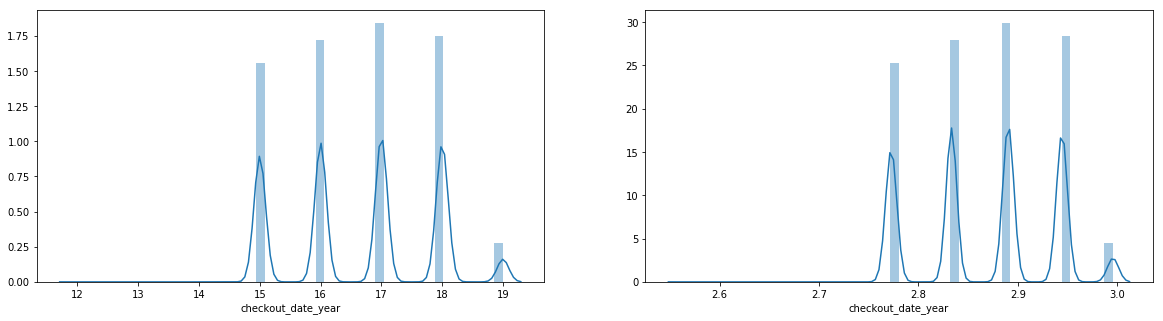

In [45]:
# Checking disturbation or any outlier if present

plt.figure(figsize=(20,5))
plt.subplot(121)
sns.distplot(train['checkout_date_year'])

plt.subplot(122)
sns.distplot(np.log1p(train['checkout_date_year'])) 

# need log transformation on numberofadults ,numberofchildren, resort_type_code, room_type_booked_code,
# roomnights, state_code_residence, total_pax, 

In [46]:
# taking log
train['numberofadults'] = np.log1p(train['numberofadults'])
train['numberofchildren'] = np.log1p(train['numberofchildren'])
train['resort_type_code'] = np.log1p(train['resort_type_code'])
train['room_type_booked_code'] = np.log1p(train['room_type_booked_code'])
train['roomnights'] = np.log1p(train['roomnights'])
train['state_code_residence'] = np.log1p(train['state_code_residence'])
train['total_pax'] = np.log1p(train['total_pax'])

test['numberofadults'] = np.log1p(test['numberofadults'])
test['numberofchildren'] = np.log1p(test['numberofchildren'])
test['resort_type_code'] = np.log1p(test['resort_type_code'])
test['room_type_booked_code'] = np.log1p(test['room_type_booked_code'])
test['roomnights'] = np.log1p(test['roomnights'])
test['state_code_residence'] = np.log1p(test['state_code_residence'])
test['total_pax'] = np.log1p(test['total_pax'])

In [47]:
X=train[['channel_code', 'main_product_code', 'numberofadults',
       'numberofchildren', 'persontravellingid', 'resort_region_code',
       'resort_type_code', 'room_type_booked_code', 'roomnights',
       'season_holidayed_code', 'state_code_residence', 'state_code_resort',
       'total_pax', 'member_age_buckets', 'booking_type_code', 'cluster_code',
       'reservationstatusid_code', 'resort_id','booking_date_month',
       'booking_date_year', 'checkin_date_month', 'checkin_date_year',
       'checkout_date_month', 'checkout_date_year','no. of days']]
Y = train['amount_spent_per_room_night_scaled']

x_test=test[['channel_code', 'main_product_code', 'numberofadults',
       'numberofchildren', 'persontravellingid', 'resort_region_code',
       'resort_type_code', 'room_type_booked_code', 'roomnights',
       'season_holidayed_code', 'state_code_residence', 'state_code_resort',
       'total_pax', 'member_age_buckets', 'booking_type_code', 'cluster_code',
       'reservationstatusid_code', 'resort_id','booking_date_month',
       'booking_date_year', 'checkin_date_month', 'checkin_date_year',
       'checkout_date_month', 'checkout_date_year','no. of days']]

In [48]:
lgb_params = {
    "objective" : "regression",
    "metric" : "rmse",
    "boosting" : 'gbdt',
    "max_bin" : 15,            # large value for better accuracy
    "learning_rate" : 0.01,     # use small value for better accuracy
#     "num_iterations" : 100,    # large value
    "num_leaves" : 10,        # use large
    "max_depth" : -1,
    "min_data_in_leaf":0,
    "bagging_speed" : 1234,
    "verbosity" : 1,
    "lambda_l1" : 4.0,
    "lambda_l2" : 5.0,
    "seed" : 1234,
    "drop_rate" : 0.5,
}

In [49]:
# from sklearn.model_selection import GridSearchCV
# classifier = lgb.LGBMClassifier(lgb_params)

# parameters=[{'max_bin':[10,100,1000,10000],'learning_rate':[0.1,0.001,0.0001],
#             'num_itertions':[10,100,1000,10000],'num_leaves':[10,100,1000,10000],
#             'drop_rate':[0.3,0.5,0.04,1],'max_depth':[-2,-1,0,1,2],'num_leaves':[10,11,12,13,14,15,16]}]
# # neg_mean_squared_error
# grid = GridSearchCV(estimator=classifier,
#                     param_grid=parameters,
#                     scoring='neg_mean_squared_error',
#                     cv = 10,
#                     n_jobs=-1)
# grid = grid.fit(np.asarray(X),np.asarray(Y))
# print(grid.best_score_)
# print(grid.best_params_)

In [50]:
from sklearn.preprocessing import StandardScaler

# Apply standardization
sc = StandardScaler()
X = sc.fit_transform(X)
x_test = sc.transform(x_test)

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.5/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/arya/.local/lib/python3.5/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [ ]:
kf = KFold(n_splits=15,shuffle=True,random_state=31)

all_preds = []
for t,v in kf.split(X,Y):
    x_train, x_valid, y_train, y_valid = X[t], X[v], Y.iloc[t], Y.iloc[v]
    lgb_train = lgb.Dataset(x_train,
                            label=y_train,)
#                            categorical_feature=['channel_code', 'main_product_code', 'numberofadults',
#                                                 'numberofchildren', 'persontravellingid', 'resort_region_code',
#                                                 'resort_type_code', 'room_type_booked_code', 'roomnights',
#                                                 'season_holidayed_code', 'state_code_residence', 'state_code_resort',
#                                                 'total_pax', 'member_age_buckets', 'booking_type_code', 'cluster_code',
#                                                 'reservationstatusid_code', 'resort_id','booking_date_month',
#                                                 'booking_date_year', 'checkin_date_month', 'checkin_date_year',
#                                                 'checkout_date_month', 'checkout_date_year','no. of days'])
    lgb_valid = lgb.Dataset(x_valid,
                            label=y_valid,)
#                             categorical_feature=['channel_code', 'main_product_code', 'numberofadults',
#                                                 'numberofchildren', 'persontravellingid', 'resort_region_code',
#                                                 'resort_type_code', 'room_type_booked_code', 'roomnights',
#                                                 'season_holidayed_code', 'state_code_residence', 'state_code_resort',
#                                                 'total_pax', 'member_age_buckets', 'booking_type_code', 'cluster_code',
#                                                 'reservationstatusid_code', 'resort_id','booking_date_month',
#                                                 'booking_date_year', 'checkin_date_month', 'checkin_date_year',
#                                                 'checkout_date_month', 'checkout_date_year','no. of days'])
    evals_result = {}
    lgb_clf = lgb.train(lgb_params,
                        lgb_train,
                        100000,
                        valid_sets = [lgb_train,lgb_valid],
                        early_stopping_rounds=5000,
                        verbose_eval = 1000,
                        evals_result = evals_result)
    all_preds.append(lgb_clf.predict(x_test))

Training until validation scores don't improve for 5000 rounds.
[1000]	training's rmse: 1.01947	valid_1's rmse: 1.01242
[2000]	training's rmse: 1.01373	valid_1's rmse: 1.00841
[3000]	training's rmse: 1.0106	valid_1's rmse: 1.00665
[4000]	training's rmse: 1.00784	valid_1's rmse: 1.00526
[5000]	training's rmse: 1.00533	valid_1's rmse: 1.00397
[6000]	training's rmse: 1.00349	valid_1's rmse: 1.00333
[7000]	training's rmse: 1.00191	valid_1's rmse: 1.00294
[8000]	training's rmse: 1.00041	valid_1's rmse: 1.0026
[9000]	training's rmse: 0.998906	valid_1's rmse: 1.00236
[10000]	training's rmse: 0.997476	valid_1's rmse: 1.00195
[11000]	training's rmse: 0.996049	valid_1's rmse: 1.00163
[12000]	training's rmse: 0.994766	valid_1's rmse: 1.0014
[13000]	training's rmse: 0.993533	valid_1's rmse: 1.00127
[14000]	training's rmse: 0.992298	valid_1's rmse: 1.00114
[15000]	training's rmse: 0.991049	valid_1's rmse: 1.00098
[16000]	training's rmse: 0.989906	valid_1's rmse: 1.00093
[17000]	training's rmse: 0.9

[24000]	training's rmse: 0.979969	valid_1's rmse: 1.01678
[25000]	training's rmse: 0.979072	valid_1's rmse: 1.01678
[26000]	training's rmse: 0.978192	valid_1's rmse: 1.01682
[27000]	training's rmse: 0.977208	valid_1's rmse: 1.01684
[28000]	training's rmse: 0.97634	valid_1's rmse: 1.01695
Early stopping, best iteration is:
[23237]	training's rmse: 0.980679	valid_1's rmse: 1.01674
Training until validation scores don't improve for 5000 rounds.
[1000]	training's rmse: 1.01816	valid_1's rmse: 1.0277
[2000]	training's rmse: 1.01238	valid_1's rmse: 1.02296
[3000]	training's rmse: 1.00947	valid_1's rmse: 1.02125
[4000]	training's rmse: 1.00652	valid_1's rmse: 1.01947
[5000]	training's rmse: 1.00426	valid_1's rmse: 1.01827
[6000]	training's rmse: 1.00229	valid_1's rmse: 1.01738
[7000]	training's rmse: 1.00049	valid_1's rmse: 1.01681
[8000]	training's rmse: 0.998883	valid_1's rmse: 1.01625
[9000]	training's rmse: 0.997436	valid_1's rmse: 1.01591
[10000]	training's rmse: 0.996042	valid_1's rmse:

[13000]	training's rmse: 0.992217	valid_1's rmse: 1.01572
[14000]	training's rmse: 0.990986	valid_1's rmse: 1.01546
[15000]	training's rmse: 0.989666	valid_1's rmse: 1.01513
[16000]	training's rmse: 0.98852	valid_1's rmse: 1.01501
[17000]	training's rmse: 0.98752	valid_1's rmse: 1.01503
[18000]	training's rmse: 0.986521	valid_1's rmse: 1.01503
[19000]	training's rmse: 0.985518	valid_1's rmse: 1.01502
[20000]	training's rmse: 0.984542	valid_1's rmse: 1.01509
[21000]	training's rmse: 0.983408	valid_1's rmse: 1.0149
[22000]	training's rmse: 0.982414	valid_1's rmse: 1.01488
[23000]	training's rmse: 0.981512	valid_1's rmse: 1.01489
[24000]	training's rmse: 0.980547	valid_1's rmse: 1.01495
[25000]	training's rmse: 0.979552	valid_1's rmse: 1.01487
[26000]	training's rmse: 0.978648	valid_1's rmse: 1.01492
[27000]	training's rmse: 0.977682	valid_1's rmse: 1.01484
[28000]	training's rmse: 0.97676	valid_1's rmse: 1.01489
[29000]	training's rmse: 0.975731	valid_1's rmse: 1.01476
[30000]	training's

In [ ]:
imp = lgb_clf.feature_importance()
fet = lgb_clf.feature_name()
sns.barplot(x=imp,y=fet)

In [ ]:
all_preds = np.vstack(all_preds)

In [ ]:
preds = np.mean(all_preds,axis=0)

In [ ]:
preds.shape

In [ ]:
submission = pd.DataFrame()
submission['reservation_id']=test_original['reservation_id']
submission['amount_spent_per_room_night_scaled'] = preds
submission

In [ ]:
submission.to_csv('lgbm1.csv',index=False)